# ML용 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/done/final_season.csv', encoding='cp949')
df

,년,지역,면적 (ha),10a당 생산량 (kg),생산량 (톤),sp평균상대습도(%),sp최소상대습도(%),su평균상대습도(%),su최소상대습도(%),fa평균상대습도(%),...,fa평균기온(℃),fa최고기온 평균(℃),fa최저기온 평균(℃),fa강수량(mm),sp평균풍속(m/s),sp최대풍속(m/s),su평균풍속(m/s),su최대풍속(m/s),fa평균풍속(m/s),fa최대풍속(m/s)
0,1980,강원도,1408,609,8574,70.5,29.5,78.7,35.7,89.5,...,18.6,23.8,14.8,1230.9,2.4,11.3,2.1,10.2,1.6,7.8
1,1980,경기도,3723,406,15116,71.5,20.0,79.7,31.3,81.5,...,20.2,25.8,15.7,436.0,1.6,8.6,1.1,6.2,0.8,4.7
2,1980,경상남도,1786,600,10718,73.5,26.0,83.7,40.0,84.5,...,20.8,25.4,17.0,2232.6,1.9,10.9,1.5,10.0,1.2,8.1
3,1980,경상북도,22667,1132,256590,70.5,31.5,77.3,35.0,84.5,...,20.0,24.6,16.2,1704.6,2.6,12.6,2.1,10.5,1.8,9.0
4,1980,광주광역시,0,0,0,67.0,20.5,77.3,31.0,79.0,...,21.3,26.4,17.4,269.1,2.6,9.0,2.0,9.3,1.6,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2021,전라남도,208,787,1635,77.5,29.5,87.0,43.3,89.5,...,24.3,28.4,21.2,2548.9,2.8,10.8,2.3,9.3,2.1,9.1
634,2021,전라북도,2033,1729,35142,73.0,23.0,81.0,33.3,87.5,...,23.5,28.3,19.8,2400.6,1.9,9.2,1.7,7.7,1.5,7.8
635,2021,제주도,0,0,0,76.5,29.5,91.7,49.7,91.0,...,25.6,28.4,23.3,1563.0,3.6,12.6,3.1,9.8,3.2,13.3
636,2021,충청남도,1551,1711,22757,67.5,16.5,79.3,31.7,84.5,...,23.4,28.0,19.6,1597.8,1.6,8.3,1.4,6.8,1.4,6.9


In [3]:
df.keys()

Index(['년', '지역', '면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)', 'sp평균상대습도(%)',
       'sp최소상대습도(%)', 'su평균상대습도(%)', 'su최소상대습도(%)', 'fa평균상대습도(%)',
       'fa최소상대습도(%)', 'sp평균현지기압(hPa)', 'sp평균해면기압(hPa)', 'sp최고해면기압(hPa)',
       'sp최저해면기압(hPa)', 'su평균현지기압(hPa)', 'su평균해면기압(hPa)', 'su최고해면기압(hPa)',
       'su최저해면기압(hPa)', 'fa평균현지기압(hPa)', 'fa평균해면기압(hPa)', 'fa최고해면기압(hPa)',
       'fa최저해면기압(hPa)', 'sp합계일조시간(hr)', 'sp합계전천일사량(MJ/㎡)', 'su합계일조시간(hr)',
       'su합계전천일사량(MJ/㎡)', 'fa합계일조시간(hr)', 'fa합계전천일사량(MJ/㎡)', 'sp평균기온(℃)',
       'sp최고기온 평균(℃)', 'sp최저기온 평균(℃)', 'sp강수량(mm)', 'su평균기온(℃)',
       'su최고기온 평균(℃)', 'su최저기온 평균(℃)', 'su강수량(mm)', 'fa평균기온(℃)',
       'fa최고기온 평균(℃)', 'fa최저기온 평균(℃)', 'fa강수량(mm)', 'sp평균풍속(m/s)',
       'sp최대풍속(m/s)', 'su평균풍속(m/s)', 'su최대풍속(m/s)', 'fa평균풍속(m/s)',
       'fa최대풍속(m/s)'],
      dtype='object')

In [4]:
# df[['면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)']].astype(float)

In [5]:
# data = df.drop(df[df['지역'] == '경상북도'].index)

In [6]:
data = df.drop(df[df['생산량 (톤)'] == 0].index)
# data = data.drop(df[df['생산량 (톤)'] >= 3000].index)
data = data[['10a당 생산량 (kg)', '생산량 (톤)', 'sp평균상대습도(%)',
       'sp최소상대습도(%)', 'su평균상대습도(%)', 'su최소상대습도(%)', 'fa평균상대습도(%)',
       'fa최소상대습도(%)', 'sp평균현지기압(hPa)', 'sp평균해면기압(hPa)', 'sp최고해면기압(hPa)',
       'sp최저해면기압(hPa)', 'su평균현지기압(hPa)', 'su평균해면기압(hPa)', 'su최고해면기압(hPa)',
       'su최저해면기압(hPa)', 'fa평균현지기압(hPa)', 'fa평균해면기압(hPa)', 'fa최고해면기압(hPa)',
       'fa최저해면기압(hPa)', 'sp합계일조시간(hr)', 'su합계일조시간(hr)', 'fa합계일조시간(hr)', 'sp평균기온(℃)',
       'sp최고기온 평균(℃)', 'sp최저기온 평균(℃)', 'sp강수량(mm)', 'su평균기온(℃)',
       'su최고기온 평균(℃)', 'su최저기온 평균(℃)', 'su강수량(mm)', 'fa평균기온(℃)',
       'fa최고기온 평균(℃)', 'fa최저기온 평균(℃)', 'fa강수량(mm)', 'sp평균풍속(m/s)',
       'sp최대풍속(m/s)', 'su평균풍속(m/s)', 'su최대풍속(m/s)', 'fa평균풍속(m/s)',
       'fa최대풍속(m/s)']]

In [7]:
# data = df[['10a당 생산량 (kg)', '합계일조시간(hr)',
#        '평균상대습도(%)', '최소상대습도(%)', '평균풍속(m/s)', '최대풍속(m/s)', '평균현지기압(hPa)',
#        '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', 'sp평균기온(℃)',
#        'sp최고기온 평균(℃)', 'sp최저기온 평균(℃)', 'sp강수량(mm)', 'su평균기온(℃)',
#        'su최고기온 평균(℃)', 'su최저기온 평균(℃)', 'su강수량(mm)', 'fa평균기온(℃)',
#        'fa최고기온 평균(℃)', 'fa최저기온 평균(℃)', 'fa강수량(mm)']]

In [8]:
data

,10a당 생산량 (kg),생산량 (톤),sp평균상대습도(%),sp최소상대습도(%),su평균상대습도(%),su최소상대습도(%),fa평균상대습도(%),fa최소상대습도(%),sp평균현지기압(hPa),sp평균해면기압(hPa),...,fa평균기온(℃),fa최고기온 평균(℃),fa최저기온 평균(℃),fa강수량(mm),sp평균풍속(m/s),sp최대풍속(m/s),su평균풍속(m/s),su최대풍속(m/s),fa평균풍속(m/s),fa최대풍속(m/s)
0,609,8574,70.5,29.5,78.7,35.7,89.5,48.0,1017.8,1023.3,...,18.6,23.8,14.8,1230.9,2.4,11.3,2.1,10.2,1.6,7.8
1,406,15116,71.5,20.0,79.7,31.3,81.5,38.5,1014.6,1019.1,...,20.2,25.8,15.7,436.0,1.6,8.6,1.1,6.2,0.8,4.7
2,600,10718,73.5,26.0,83.7,40.0,84.5,47.0,1021.2,1018.4,...,20.8,25.4,17.0,2232.6,1.9,10.9,1.5,10.0,1.2,8.1
3,1132,256590,70.5,31.5,77.3,35.0,84.5,50.5,1021.0,1019.5,...,20.0,24.6,16.2,1704.6,2.6,12.6,2.1,10.5,1.8,9.0
9,237,1278,73.0,25.5,85.0,40.3,84.0,46.0,1019.4,1019.3,...,21.4,25.8,17.8,1610.0,3.0,11.9,2.2,9.5,2.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,355,46,71.0,17.0,84.3,34.0,83.5,43.5,1014.0,1019.8,...,23.2,26.7,20.2,597.0,3.0,10.0,2.5,9.6,2.6,8.1
633,787,1635,77.5,29.5,87.0,43.3,89.5,64.5,1018.4,1019.5,...,24.3,28.4,21.2,2548.9,2.8,10.8,2.3,9.3,2.1,9.1
634,1729,35142,73.0,23.0,81.0,33.3,87.5,46.5,1018.0,1019.8,...,23.5,28.3,19.8,2400.6,1.9,9.2,1.7,7.7,1.5,7.8
636,1711,22757,67.5,16.5,79.3,31.7,84.5,44.5,1018.4,1020.0,...,23.4,28.0,19.6,1597.8,1.6,8.3,1.4,6.8,1.4,6.9


## 생산량의 분포 확인

<AxesSubplot:>

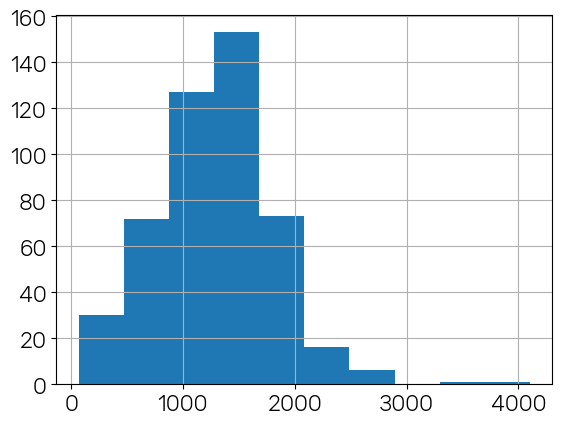

In [9]:
data['10a당 생산량 (kg)'].hist()

<AxesSubplot:>

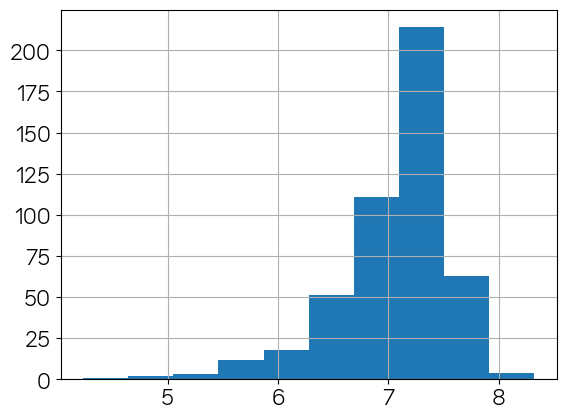

In [10]:
y_log_transform = np.log1p(data['10a당 생산량 (kg)'])
y_log_transform.hist()

In [11]:
data['10a당 생산량 (kg)'] = y_log_transform

# 컬럼별 히트맵

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

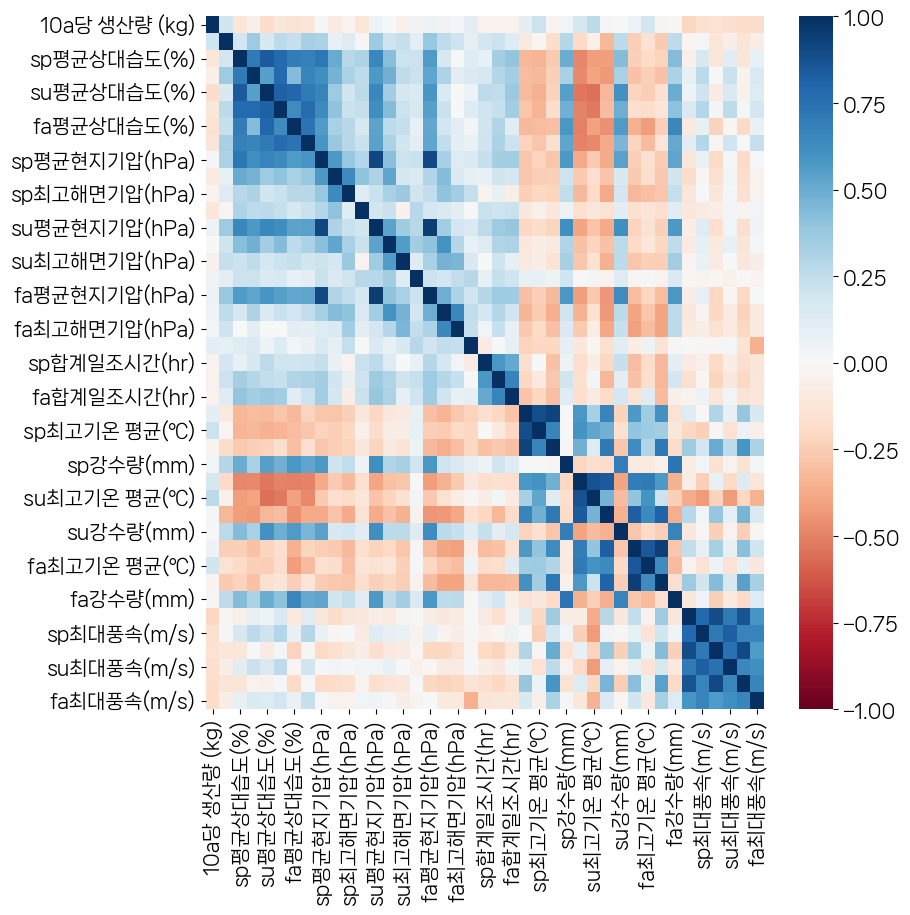

In [13]:
plt.figure(figsize=(9, 9))
corr = data.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)

# 컬럼이 회귀 결과에 미치는 영향 시각화

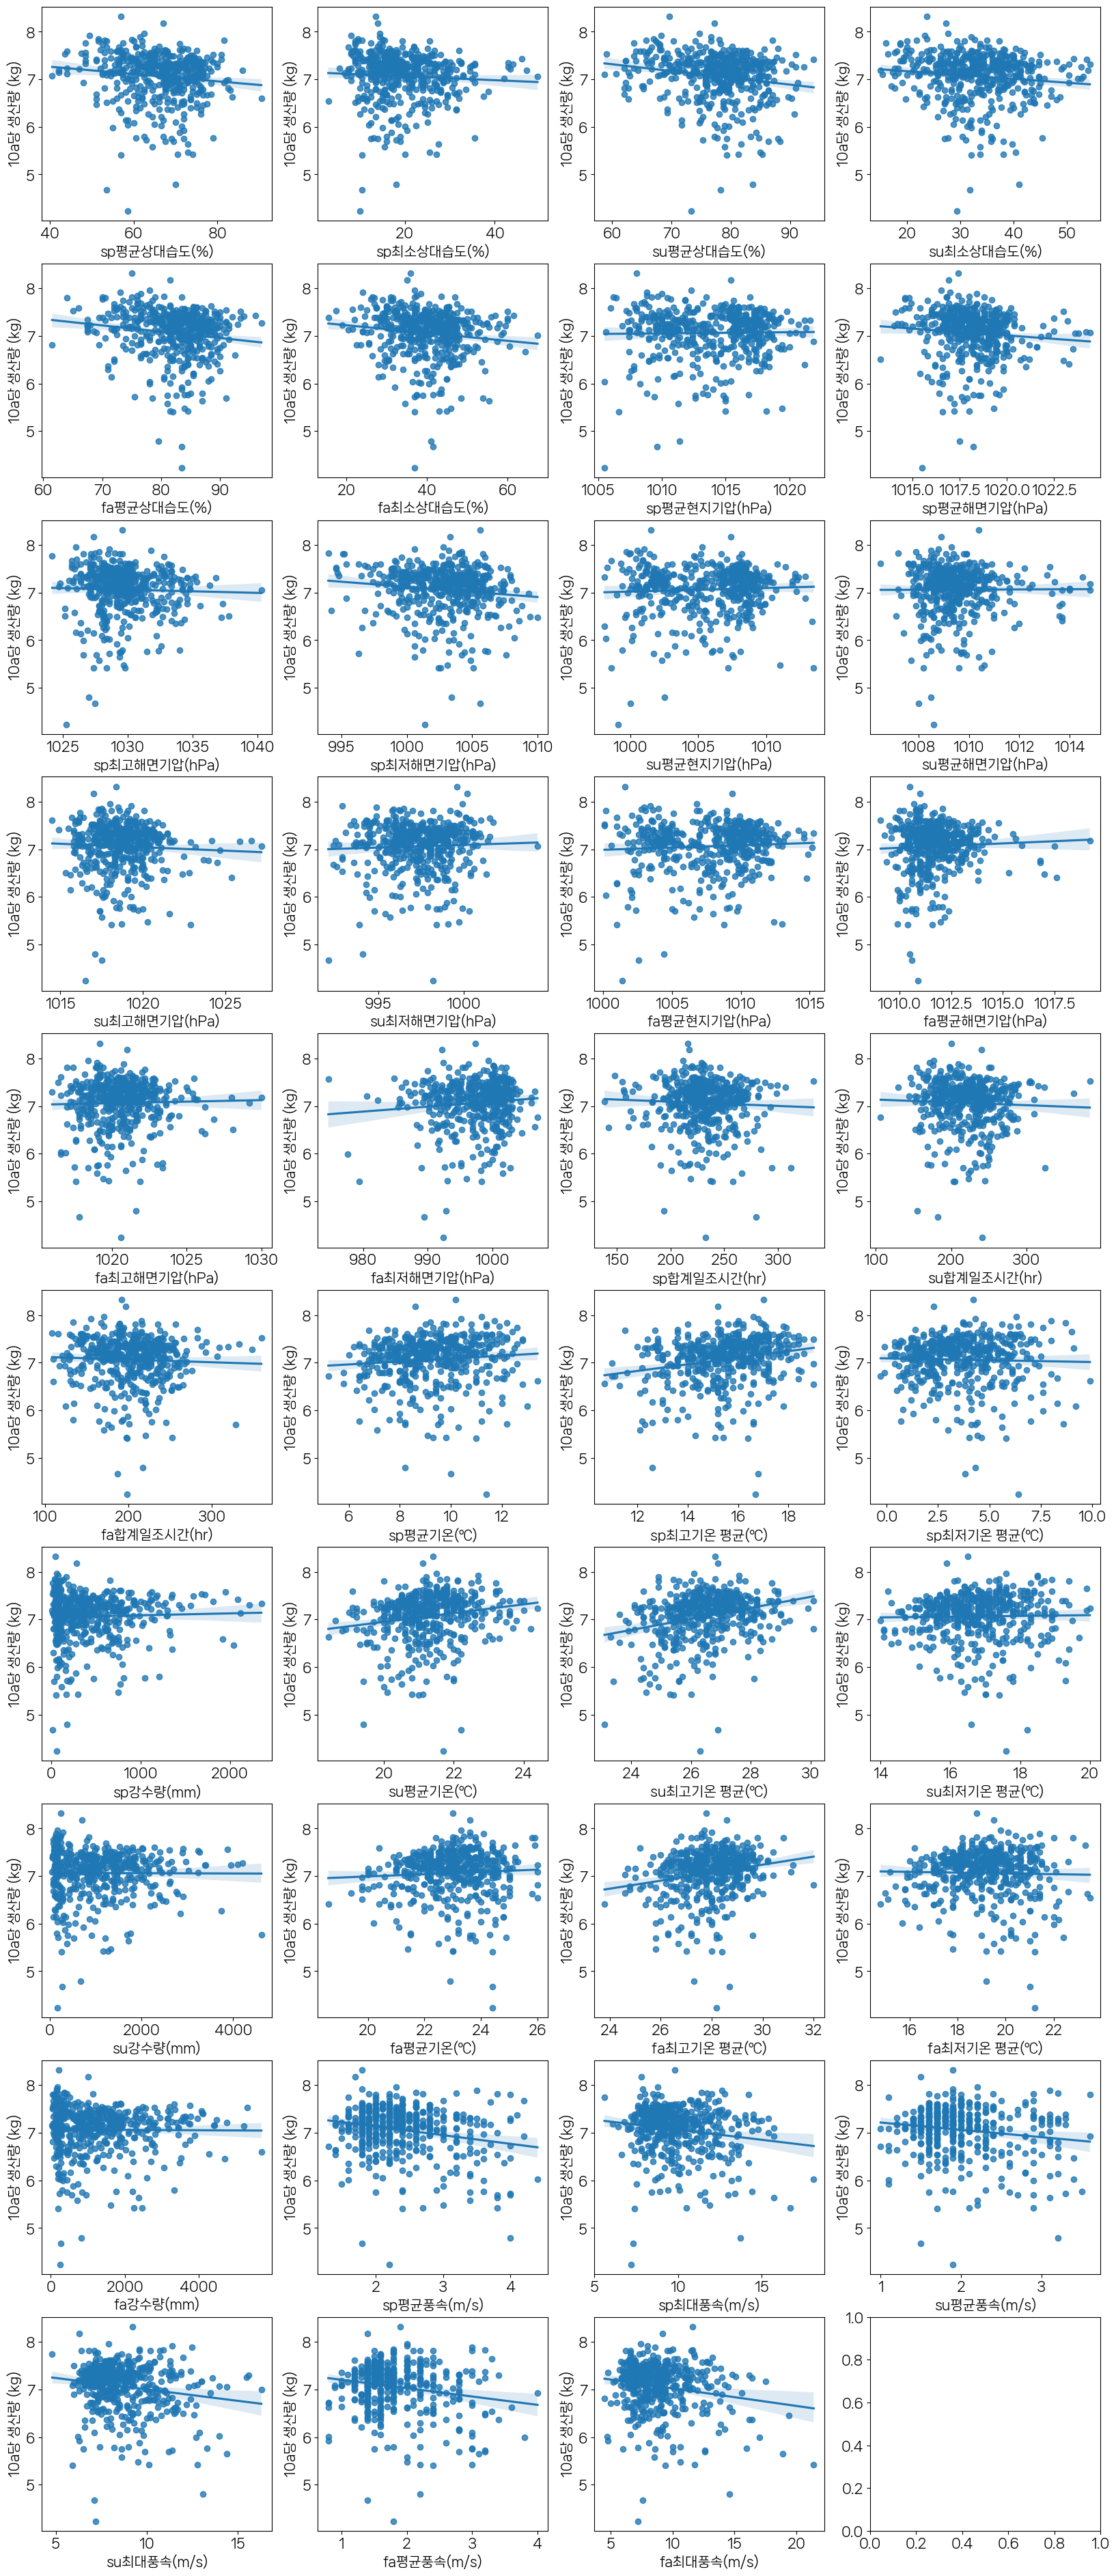

In [14]:
# 각 컬럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화
data_features = ['sp평균상대습도(%)',
       'sp최소상대습도(%)', 'su평균상대습도(%)', 'su최소상대습도(%)', 'fa평균상대습도(%)',
       'fa최소상대습도(%)', 'sp평균현지기압(hPa)', 'sp평균해면기압(hPa)', 'sp최고해면기압(hPa)',
       'sp최저해면기압(hPa)', 'su평균현지기압(hPa)', 'su평균해면기압(hPa)', 'su최고해면기압(hPa)',
       'su최저해면기압(hPa)', 'fa평균현지기압(hPa)', 'fa평균해면기압(hPa)', 'fa최고해면기압(hPa)',
       'fa최저해면기압(hPa)', 'sp합계일조시간(hr)', 'su합계일조시간(hr)', 'fa합계일조시간(hr)', 'sp평균기온(℃)',
       'sp최고기온 평균(℃)', 'sp최저기온 평균(℃)', 'sp강수량(mm)', 'su평균기온(℃)',
       'su최고기온 평균(℃)', 'su최저기온 평균(℃)', 'su강수량(mm)', 'fa평균기온(℃)',
       'fa최고기온 평균(℃)', 'fa최저기온 평균(℃)', 'fa강수량(mm)', 'sp평균풍속(m/s)',
       'sp최대풍속(m/s)', 'su평균풍속(m/s)', 'su최대풍속(m/s)', 'fa평균풍속(m/s)',
       'fa최대풍속(m/s)']
fig, axs = plt.subplots(figsize=(20, 48), ncols=4, nrows=10)
for i , feature in enumerate(data_features):
    row = int(i / 4)
    col = i % 4
    
    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='10a당 생산량 (kg)', data=data, ax=axs[row][col])

# 선형 회귀

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [16]:
y = data['10a당 생산량 (kg)']
X = data.drop(columns='10a당 생산량 (kg)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [17]:
# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) # = mean_squared_error(y_test, pred, squared=False)
print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2: {r2_score(y_test, pred):.3f}')

MSE: 0.289, RMSE: 0.538, R2: 0.045


In [18]:
print(f'절편값: {lr.intercept_}')
print(f'회귀 계수값: {np.round(lr.coef_, 1)}')

절편값: 20.002094615794658
회귀 계수값: [ 0.   0.  -0.  -0.  -0.  -0.  -0.   0.1 -0.1 -0.  -0.  -0.1  0.2 -0.1
  0.   0.1 -0.  -0.   0.  -0.   0.  -0.   0.2 -0.  -0.1 -0.   0.4 -0.3
 -0.2 -0.  -0.1  0.2 -0.   0.  -0.4  0.   0.4 -0.  -0.   0. ]


In [19]:
# 회귀 계수를 큰 값 순으로 정렬(Serise로 생성)
pd.Series(np.round(lr.coef_, 1), index=X.columns).sort_values(ascending=False)

su평균기온(℃)        0.4
su평균풍속(m/s)      0.4
fa최고기온 평균(℃)     0.2
sp평균기온(℃)        0.2
su평균해면기압(hPa)    0.2
fa평균현지기압(hPa)    0.1
sp평균현지기압(hPa)    0.1
fa합계일조시간(hr)    -0.0
sp최고기온 평균(℃)    -0.0
sp강수량(mm)       -0.0
생산량 (톤)          0.0
su강수량(mm)       -0.0
sp합계일조시간(hr)    -0.0
fa최저기온 평균(℃)    -0.0
fa강수량(mm)        0.0
sp최대풍속(m/s)      0.0
su최대풍속(m/s)     -0.0
fa평균풍속(m/s)     -0.0
sp평균상대습도(%)      0.0
su합계일조시간(hr)     0.0
fa최저해면기압(hPa)    0.0
sp최저해면기압(hPa)   -0.0
sp최소상대습도(%)     -0.0
su평균상대습도(%)     -0.0
su최소상대습도(%)     -0.0
fa평균상대습도(%)     -0.0
fa최소상대습도(%)     -0.0
sp최고해면기압(hPa)   -0.0
fa최고해면기압(hPa)   -0.0
fa최대풍속(m/s)      0.0
su최저해면기압(hPa)    0.0
fa평균해면기압(hPa)   -0.0
sp평균해면기압(hPa)   -0.1
su평균현지기압(hPa)   -0.1
su최고해면기압(hPa)   -0.1
sp최저기온 평균(℃)    -0.1
fa평균기온(℃)       -0.1
su최저기온 평균(℃)    -0.2
su최고기온 평균(℃)    -0.3
sp평균풍속(m/s)     -0.4
dtype: float64

In [20]:
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 folds 개별 Negative MSE scores: {np.round(neg_mse_scores, 2)}')
print(f'5 folds 개별 RMSE scores: {np.round(rmse_scores, 2)}')
print(f'5 folds 평균 RMSE: {np.round(avg_rmse, 3)}')

5 folds 개별 Negative MSE scores: [-0.37 -0.2  -0.38 -0.2  -0.54]
5 folds 개별 RMSE scores: [0.61 0.45 0.62 0.44 0.73]
5 folds 평균 RMSE: 0.571


In [21]:
# 릿지에 사용될 alpha 파라미터 정의
alphas = [0, 0.1, 1, 10, 100]

# alpha list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'5 folds 평균 RMSE: {np.round(avg_rmse, 3)}')

5 folds 평균 RMSE: 0.571
5 folds 평균 RMSE: 0.57
5 folds 평균 RMSE: 0.565
5 folds 평균 RMSE: 0.554
5 folds 평균 RMSE: 0.542


In [22]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7) # L1과 L2의 비율
        
        # 교차검증, 점수
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:' + str(param)
            coeff_df[colname] = coeff

    return coeff_df
# end of get_linear_regre_eval

In [23]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', lasso_alphas, X, y)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.519 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.514 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.506 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.507 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.503 


In [24]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', elastic_alphas, X, y)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.522 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.518 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.505 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.507 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.504 


In [25]:
# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [26]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                 ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_scaled_data = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X)
    print(f'\n## 변환 유형: {scale_method[0]}, Polynomial Degree: {scale_method[1]}')
    get_linear_reg_eval('Ridge', alphas, X_scaled_data, y, return_coeff=False)


## 변환 유형: None, Polynomial Degree: None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.570 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.565 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.554 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.542 

## 변환 유형: Standard, Polynomial Degree: None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.570 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.565 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.548 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.513 

## 변환 유형: Standard, Polynomial Degree: 2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1.015 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.944 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.734 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.567 

## 변환 유형: MinMax, Polynomial Degree: None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.558 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.529 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.494 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.494 

## 변환 유형: MinMax, Polynomial Degree: 2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.615 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.546 
alph

# 회귀 트리

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

In [30]:
# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.418, RMSE: 532.776, MAE: 372.126
### GradientBoostingRegressor ###
RMSLE: 0.419, RMSE: 516.394, MAE: 380.576
### XGBRegressor ###
RMSLE: 0.449, RMSE: 532.990, MAE: 375.583
### LGBMRegressor ###
RMSLE: 0.427, RMSE: 530.700, MAE: 364.592


In [31]:
# fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
# cat_features = ['sp평균상대습도(%)', 'sp최소상대습도(%)', 'su평균상대습도(%)', 'su최소상대습도(%)', 'fa평균상대습도(%)',
#        'fa최소상대습도(%)', 'sp평균현지기압(hPa)', 'sp평균해면기압(hPa)', 'sp최고해면기압(hPa)',
#        'sp최저해면기압(hPa)', 'su평균현지기압(hPa)', 'su평균해면기압(hPa)', 'su최고해면기압(hPa)',
#        'su최저해면기압(hPa)', 'fa평균현지기압(hPa)', 'fa평균해면기압(hPa)', 'fa최고해면기압(hPa)',
#        'fa최저해면기압(hPa)', 'sp합계일조시간(hr)', 'su합계일조시간(hr)', 'fa합계일조시간(hr)', 'sp평균기온(℃)',
#        'sp최고기온 평균(℃)', 'sp최저기온 평균(℃)', 'sp강수량(mm)', 'su평균기온(℃)',
#        'su최고기온 평균(℃)', 'su최저기온 평균(℃)', 'su강수량(mm)', 'fa평균기온(℃)',
#        'fa최고기온 평균(℃)', 'fa최저기온 평균(℃)', 'fa강수량(mm)', 'sp평균풍속(m/s)',
#        'sp최대풍속(m/s)', 'su평균풍속(m/s)', 'su최대풍속(m/s)', 'fa평균풍속(m/s)',
#        'fa최대풍속(m/s)']
# # cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 court의 합을 barplot으로 시각화
# for i, feature in enumerate(cat_features):
#     row = int(1/4)
#     col = i%4
#     # 시본의 barplo을 이용해 칼럼값에 따른 court의 합을 표현
#     sns.barplot(x=feature, y='10a당 생산량 (kg)', data=df, ax=axs[row][col])